125.33136080008067


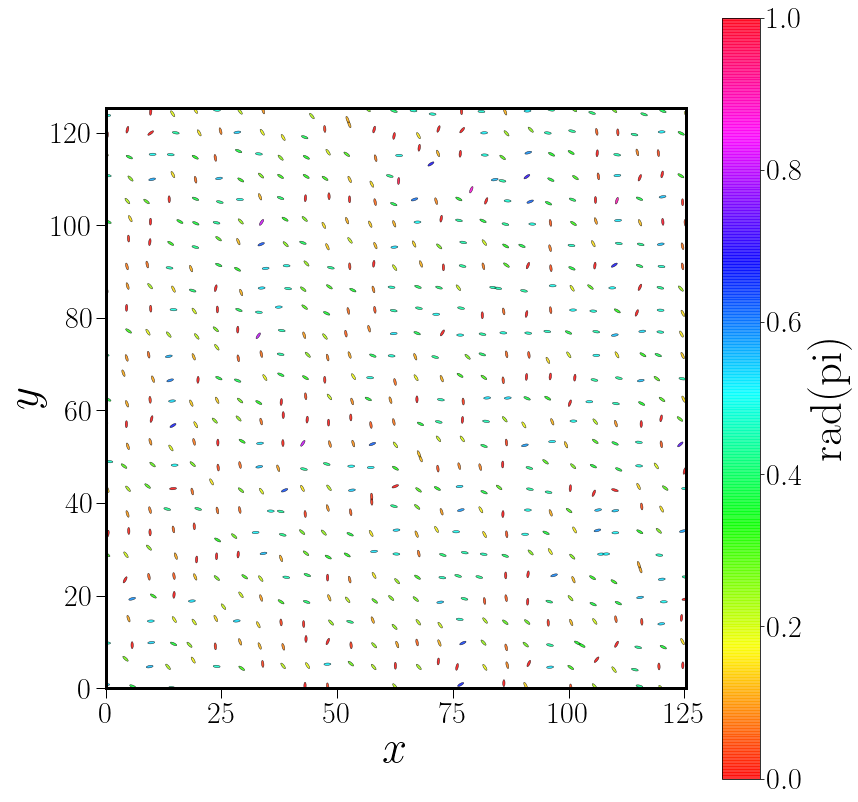

In [27]:
%matplotlib inline
import math
import matplotlib
#matplotlib.use("Agg")
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

plt.rcParams['font.family'] = 'Arial' #使用するフォント名
plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30

from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import numpy as np

resolution = 10 # the number of vertices

fig = plt.figure(figsize=(13,14))
ax = fig.add_subplot(111)

kappa = 3
chi=0.8
Np=1000
rho=0.1
temp=0.001 ## related to the number of coordinate cos output would be carried out only 1 time in each temp??
L = ((1.+1.)/4.)*((3.14159*2*Np)/0.1)**0.5

##(Np*3.14159*(1+1.**2)/8.*2.**0.333333*(1.+2.*chi)**(1./6.) / rho)**0.5;


#ax.text(0, L+5, "WCA, $T=0.1,\ \ a_{\ell}/a_s=1.66$", size =40, color = "k")

x, y,theta,r= np.loadtxt("coord_1_chi0.8_T0.001.dat", comments='#', unpack=True)
    #LJ/0.95bina/chi2/0.01/

patches = []
for i in range(Np):
    circle = mpatches.Ellipse(xy=(x[i],y[i]), width=r[i]/2., height=kappa*r[i]/2.,angle=theta[i]/6.28*360)
    patches.append(circle)
    
    
#print( (1+2*chi)**(1/6))
print(L)

plt.xlim(0, L)
plt.ylim(0, L)   

colors = theta/3.141592
#colors = np.cos(2*theta) 
#p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.8)
p = PatchCollection(patches, cmap=matplotlib.cm.hsv, alpha=0.8,ec='k',linewidth = 0.5)
p.set_array(colors)
#####color range ####
p.set_clim(0, 1) # it finishes at pi 3.141
#####
ax.add_collection(p)

C=plt.colorbar(p)
C.set_label("rad(pi)", fontname="Arial", fontsize=45) 
#C.set_label(r"$[\theta]_{\pi}$", fontname="Arial", fontsize=45) 

ax.spines['top'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['right'].set_linewidth(3)
plt.tick_params(which='major',width = 1, length = 10)
plt.tick_params(which='minor',width = 1, length = 5)
plt.xticks(color='k', size=30)
plt.yticks(color='k', size=30)
plt.xlabel(r"$x$",color='k', size=45)
plt.ylabel(r"$y$",color='k', size=45)

ax.set_aspect('equal')

plt.savefig('/Users/arata/master/probably/BD_eq/pdf/GB_N1000_chi{}_T0.001.pdf'.format(chi),bbox_inches="tight")
plt.show()